In [49]:
import numpy as np 
import pandas as pd
import os
import scipy.stats as ss
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV
from scipy.stats import f_oneway
import pandas as pd
import datetime
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [50]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # 텐서플로가 첫 번째 GPU에 1GB 메모리만 할당하도록 제한
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
  except RuntimeError as e:
    # 프로그램 시작시에 가상 장치가 설정되어야만 합니다
    print(e)

In [55]:
# 데이터 불러오기
past_sales = pd.read_csv('C:/Users/rlaeo/OneDrive/바탕 화면/rossmann.csv')
store = pd.read_csv('C:/Users/rlaeo/OneDrive/바탕 화면/store.csv')

# 데이터 제거
store = store.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'], axis=1)

# 데이터 병합
data = pd.merge(left = past_sales,right = store, on = 'Store', how = 'right')
data['Date'] = pd.to_datetime(data['Date'])
data['YearMonth'] = data['Date'].dt.to_period('M')
monthly_mean = data.groupby('YearMonth')['Sales'].mean()
# 결측값 처리
data = data.dropna(axis=0)

# store,open 이름 제거
data = data.drop(['Open'],axis=1)

data

C:\Users\rlaeo\AppData\Local\Temp\ipykernel_10296\1347642523.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  past_sales = pd.read_csv('C:/Users/rlaeo/OneDrive/바탕 화면/rossmann.csv')


,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,YearMonth
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,0,2015-07
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,0,2015-07
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,0,2015-07
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,0,2015-07
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,0,2015-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,0,0,1,d,c,5350.0,1,2013-01
1017205,1115,5,2013-01-04,4540,326,0,0,1,d,c,5350.0,1,2013-01
1017206,1115,4,2013-01-03,4297,300,0,0,1,d,c,5350.0,1,2013-01
1017207,1115,3,2013-01-02,3697,305,0,0,1,d,c,5350.0,1,2013-01


In [52]:
data = data.groupby('Store').get_group(610)
data

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
555830,610,5,2015-07,4209,523,1,0,1,a,a,660.0,0
555831,610,4,2015-07,4228,470,1,0,1,a,a,660.0,0
555832,610,3,2015-07,4465,527,1,0,1,a,a,660.0,0
555833,610,2,2015-07,4857,579,1,0,1,a,a,660.0,0
555834,610,1,2015-07,6096,592,1,0,1,a,a,660.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
556767,610,6,2013-01,3006,391,0,0,0,a,a,660.0,0
556768,610,5,2013-01,3736,513,0,0,1,a,a,660.0,0
556769,610,4,2013-01,3304,453,0,0,1,a,a,660.0,0
556770,610,3,2013-01,3540,488,0,0,1,a,a,660.0,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


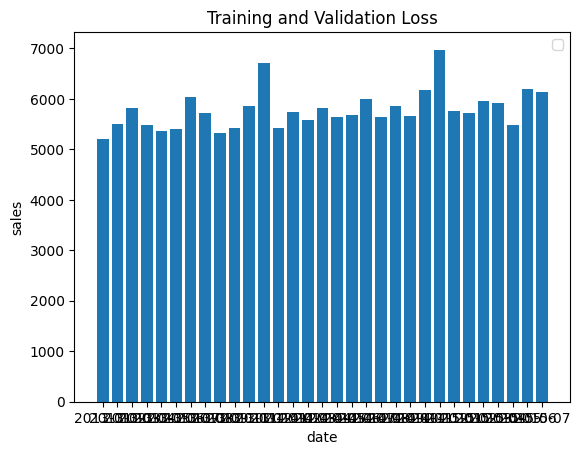

In [56]:
import matplotlib.pyplot as plt
# 손실 그래프
plt.bar(monthly_mean.index.astype(str), monthly_mean.values)

plt.title('Training and Validation Loss')
plt.xlabel('date')
plt.ylabel('sales')
plt.legend()
